<a href="https://colab.research.google.com/github/rahulsm27/ML/blob/main/DPMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

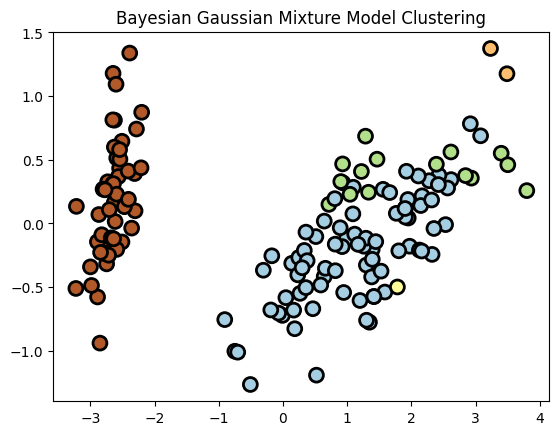

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
labels_true = iris.target


# Fit BayesianGaussianMixture model
n_components = 100 # Number of maximum components/clusters
bgm = BayesianGaussianMixture(n_components=n_components,weight_concentration_prior=5, covariance_type='full', random_state=42)
bgm.fit(X)

# Predict cluster assignments
labels_pred = bgm.predict(X)



In [27]:
set(labels_pred)

{5, 8, 13, 19, 21}

In [15]:
# Perform dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pred, edgecolors='k', cmap=plt.cm.Paired, marker='o', s=100, linewidth=2)
plt.title('Bayesian Gaussian Mixture Model Clustering')
plt.show()


array([[5.84397802, 3.05697062, 3.75984809, 1.20014203],
       [5.84397365, 3.05697308, 3.75983554, 1.20013654],
       [5.8439693 , 3.05697553, 3.75982308, 1.20013109],
       [5.84396498, 3.05697796, 3.75981071, 1.20012567],
       [5.84396069, 3.05698037, 3.75979842, 1.20012029],
       [6.08844866, 2.83875177, 4.7621209 , 1.66163888],
       [5.84394692, 3.05698812, 3.75975894, 1.20010302],
       [5.84393755, 3.05699339, 3.75973208, 1.20009126],
       [6.96868813, 2.95784714, 5.34063703, 1.63883409],
       [5.8439168 , 3.05700506, 3.75967258, 1.20006523],
       [5.84390549, 3.05701142, 3.75964017, 1.20005104],
       [5.8438944 , 3.05701766, 3.7596084 , 1.20003714],
       [5.84388354, 3.05702377, 3.75957725, 1.20002351],
       [7.12860269, 3.54141566, 5.59779717, 1.79343469],
       [5.84386201, 3.05703588, 3.75951555, 1.19999651],
       [5.84385137, 3.05704187, 3.75948503, 1.19998315],
       [5.84384093, 3.05704774, 3.75945512, 1.19997007],
       [5.84383072, 3.05705349,

In [16]:
bgm.weights_

array([6.64987953e-003, 6.60565450e-003, 6.56172367e-003, 6.51808508e-003,
       6.47473678e-003, 5.42050877e-001, 6.33581592e-003, 6.24138416e-003,
       9.33852727e-002, 6.03214965e-003, 5.91813617e-003, 5.80627821e-003,
       5.69653500e-003, 1.71156376e-002, 5.47894904e-003, 5.37119382e-003,
       5.26555831e-003, 5.16200078e-003, 5.06048034e-003, 4.96095696e-003,
       4.86339113e-003, 2.42397768e-001, 4.70649064e-005, 4.65989172e-007,
       4.61375418e-009, 4.56807344e-011, 4.52284499e-013, 4.47806435e-015,
       4.43372708e-017, 4.38982879e-019, 4.34636514e-021, 4.30333182e-023,
       4.26072458e-025, 4.21853918e-027, 4.17677147e-029, 4.13541730e-031,
       4.09447257e-033, 4.05393324e-035, 4.01379529e-037, 3.97405474e-039,
       3.93470766e-041, 3.89575016e-043, 3.85717838e-045, 3.81898849e-047,
       3.78117673e-049, 3.74373933e-051, 3.70667261e-053, 3.66997288e-055,
       3.63363651e-057, 3.59765991e-059, 3.56203952e-061, 3.52677180e-063,
       3.49185327e-065, 3

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.dpmeans import dpmeans
from sklearn import datasets
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
labels_true = iris.target

# Perform dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert the data to a format suitable for pyclustering
data = np.column_stack((X_pca, labels_true))

# Set parameters for DPMM
initial_centers = [[2.5, 1], [2.5, -1], [0, 0]]  # Initial cluster centers
dpmm_instance = dpmeans(data, initial_centers)

# Run DPMM
dpmm_instance.process()
clusters = dpmm_instance.get_clusters()
centers = dpmm_instance.get_centers()
labels = dpmm_instance.get_labels()

# Visualize the results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, data[:, 0:2])
visualizer.append_cluster(centers, marker='x', markersize=10)
visualizer.show()

# Plot true labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_true, edgecolors='k', cmap=plt.cm.Paired, marker='o', s=100, linewidth=2)
plt.title('True Labels')
plt.show()


ModuleNotFoundError: ignored